No handles with labels found to put in legend.


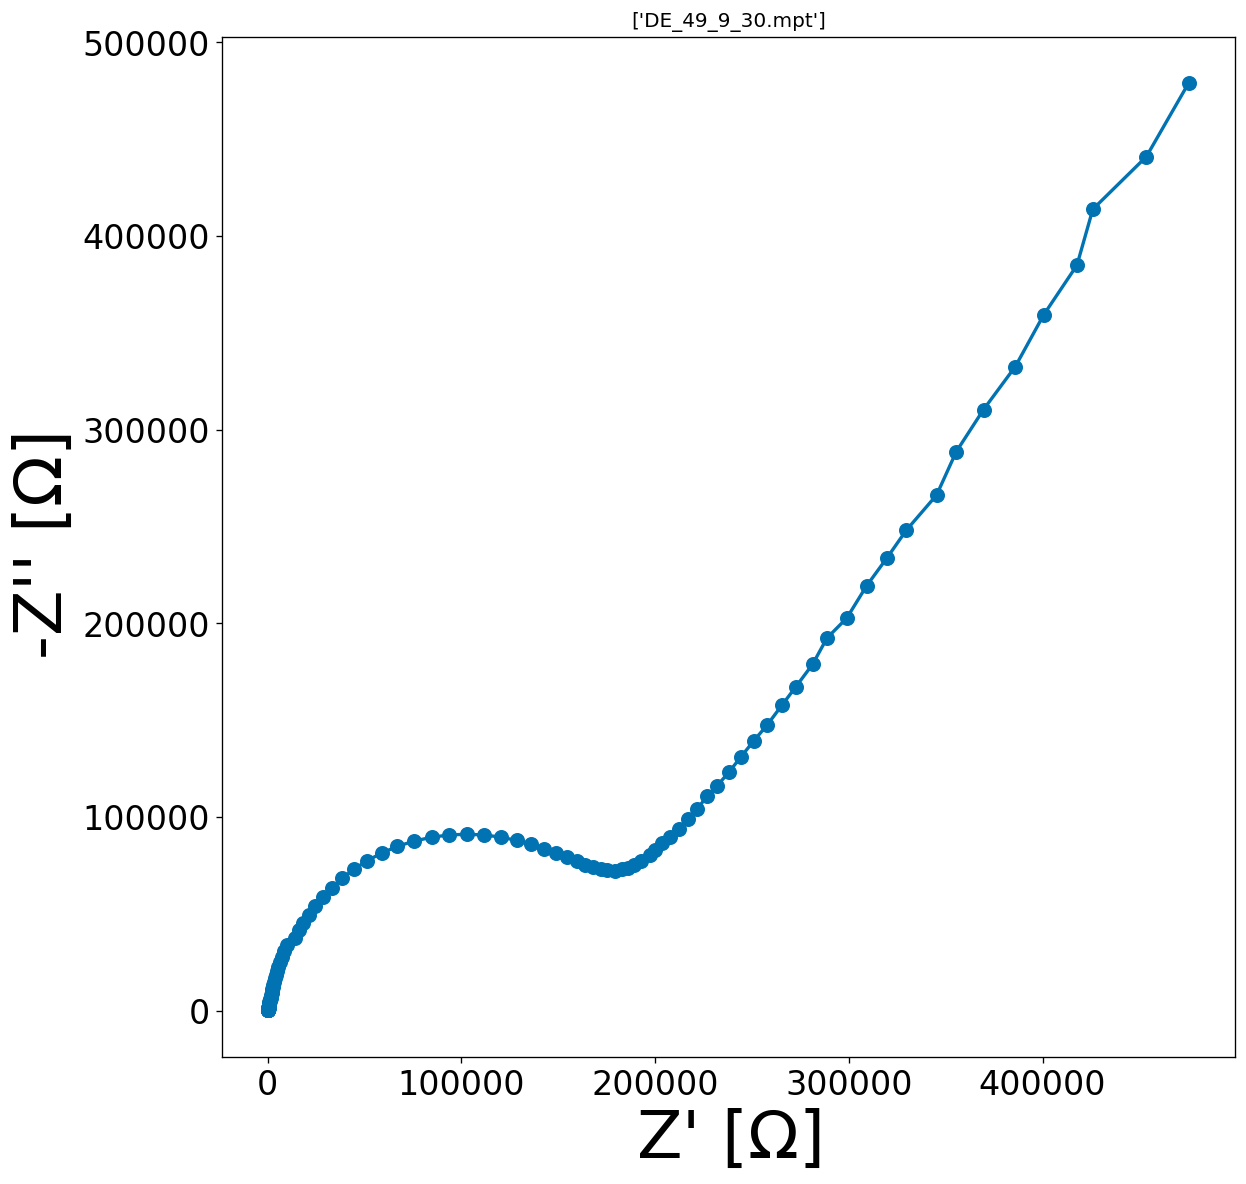

In [9]:
#SCRIPT TO TEST AND DEBUG SPEEDS FOR R-RQ-Q Circiuit
from tools import *
import IPython
mpt = mpt_data(data = ['DE_49_9_30.mpt'])
masked_mpt = mpt_data(data = ['copy.mpt'], mask = mpt.fast_mask())
mpt.mpt_plot()

running on  3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
No handles with labels found to put in legend.
time to calculate:  7.414035797119141  seconds


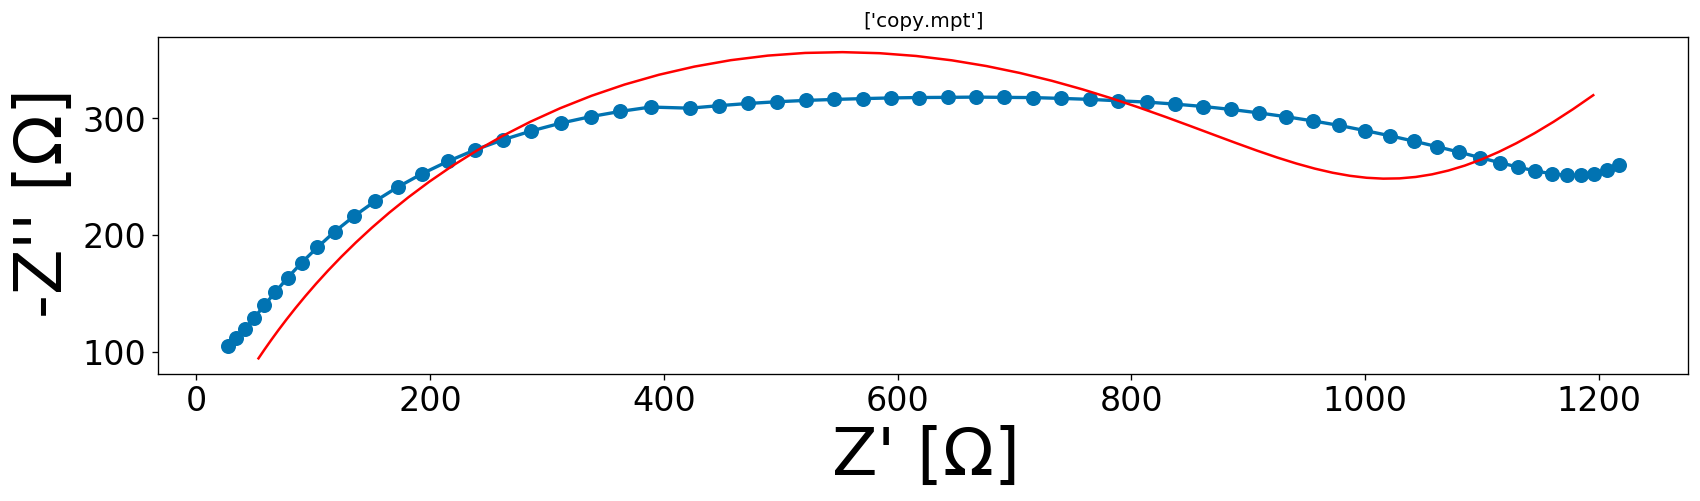

,file,fit_Rs,fit_R1,fit_n1,fit_Q1,fit_n2,fit_Q2
0,copy.mpt,0.026666,938.101681,0.502352,0.000032,0.757102,7.051665e-08


In [2]:
masked_mpt.guesser(circuit = 'R-RQ-Q', no_of_fits= 20)

In [11]:
def leastsq_errorfunc(self, params, w, re, im, circuit, weight_func = 'modulus'):
    if circuit == 'R-RQ-RQ':
        re_fit = cir_RsRQRQ_fit(params, w).real
        im_fit = -cir_RsRQRQ_fit(params, w).imag
    elif circuit == 'R-RQ-Q':
        re_fit = cir_RsRQQ_fit(params, w).real
        im_fit = -cir_RsRQQ_fit(params, w).imag
    elif circuit == 'R-RQ-RQ2':
        re_fit = cir_RsRQRQ2_fit(params, w).real
        im_fit = -cir_RsRQRQ2_fit(params, w).imag
    elif circuit == 'R-RQ-RQ-Q':
        re_fit = cir_RsRQRQQ_fit(params, w).real
        im_fit = -cir_RsRQRQQ_fit(params, w).imag
    else:
        print('Circuit is not defined in leastsq_errorfunc()')

    error = ([(re-re_fit)**2, (im-im_fit)**2]) #sum of squares

In [19]:
import random as rand
re = masked_mpt.df[0]['re']
freq = masked_mpt.df[0]['f']
im = masked_mpt.df[0]['im']
circuit = "R-RQ-Q"
param_list = []
for i in range(10):
        Rs_guess = min(re)
        R1_guess = max(re)//4
        n1_guess = rand.uniform(0, 1)
        q1_guess = rand.uniform(0, .001)
        #R2_guess = 2*max(self.df[0]['re'])//4
        n2_guess = rand.uniform(0, 1)
        q2_guess = rand.uniform(0, .001)
        #Q3_guess = random.uniform(0, .001)
        #n3_guess = random.uniform(0, 1)
        params = Parameters()
        params.add('Rs', value=Rs_guess, min=Rs_guess*.001, max=Rs_guess*10)
        params.add('R1', value=R1_guess, min=R1_guess*.001, max=R1_guess*10)
        params.add('n', value=n1_guess, min=0, max=1)
        #params.add('fs1', value=fs1_guess, min=10**-2, max=10**10)
        params.add('Q', value=q1_guess, min=0, max=.001)
        #params.add('R2', value=R2_guess, min=R2_guess*.001, max=R2_guess*10)
        params.add('n1', value=n2_guess, min=.01, max=1)
        #params.add('fs2', value=fs2_guess, min=fs2_guess**.1, max=10**10)
        params.add('Q1', value=q2_guess, min=0, max=.001)
        param_list.append(params)
        circuit = 'R-RQ-Q'
        weight_func = 'modulus'
        nan_policy = 'raise'
        maxfev = 5000
        #MINIMIZE CANNOT TAKE IN LISTS
        #IT MUST BE PD SERIES
        #ALSO IT MUST BE CALLED SERIES.VALUES
        #NOT JUST SERIES
        fitted_data = minimize(masked_mpt.leastsq_errorfunc, params, method='leastsq', args=(freq.values, re.values, im.values, circuit, weight_func), nan_policy=nan_policy, max_nfev=maxfev)
        print(fitted_data.chisqr)
optimal_params = param_list[init_guesses.index(min(init_guesses))]
fitted_dict = optimal_params.valuesdict()
fitted_data=minimize(leastsq_errorfunc, optimal_params, method='leastsq', args=(freq.values, re.values, im.values, circuit, weight_func), nan_policy=nan_policy, maxfev=maxfev)
fitted_points = cir_RsRQQ(w=freq.values, Rs=fitted_data.params.get('Rs').value, R=fitted_data[i].params.get('R1').value, n=fitted_data[i].params.get('n').value, Q=fitted_data[i].params.get('Q1').value, R2=fitted_data[i].params.get('R2').value, n2=fitted_data[i].params.get('n2').value, Q2=fitted_data[i].params.get('Q2').value)    

907966760.7626935
294.4428140517635
294.4340020830524
294.43400216186143
294.43423082056455
859154965.8343092
294.434061557542
1802.1350096010437
931764186.4015596
934746086.9118865


NameError: name 'init_guesses' is not defined

No handles with labels found to put in legend.


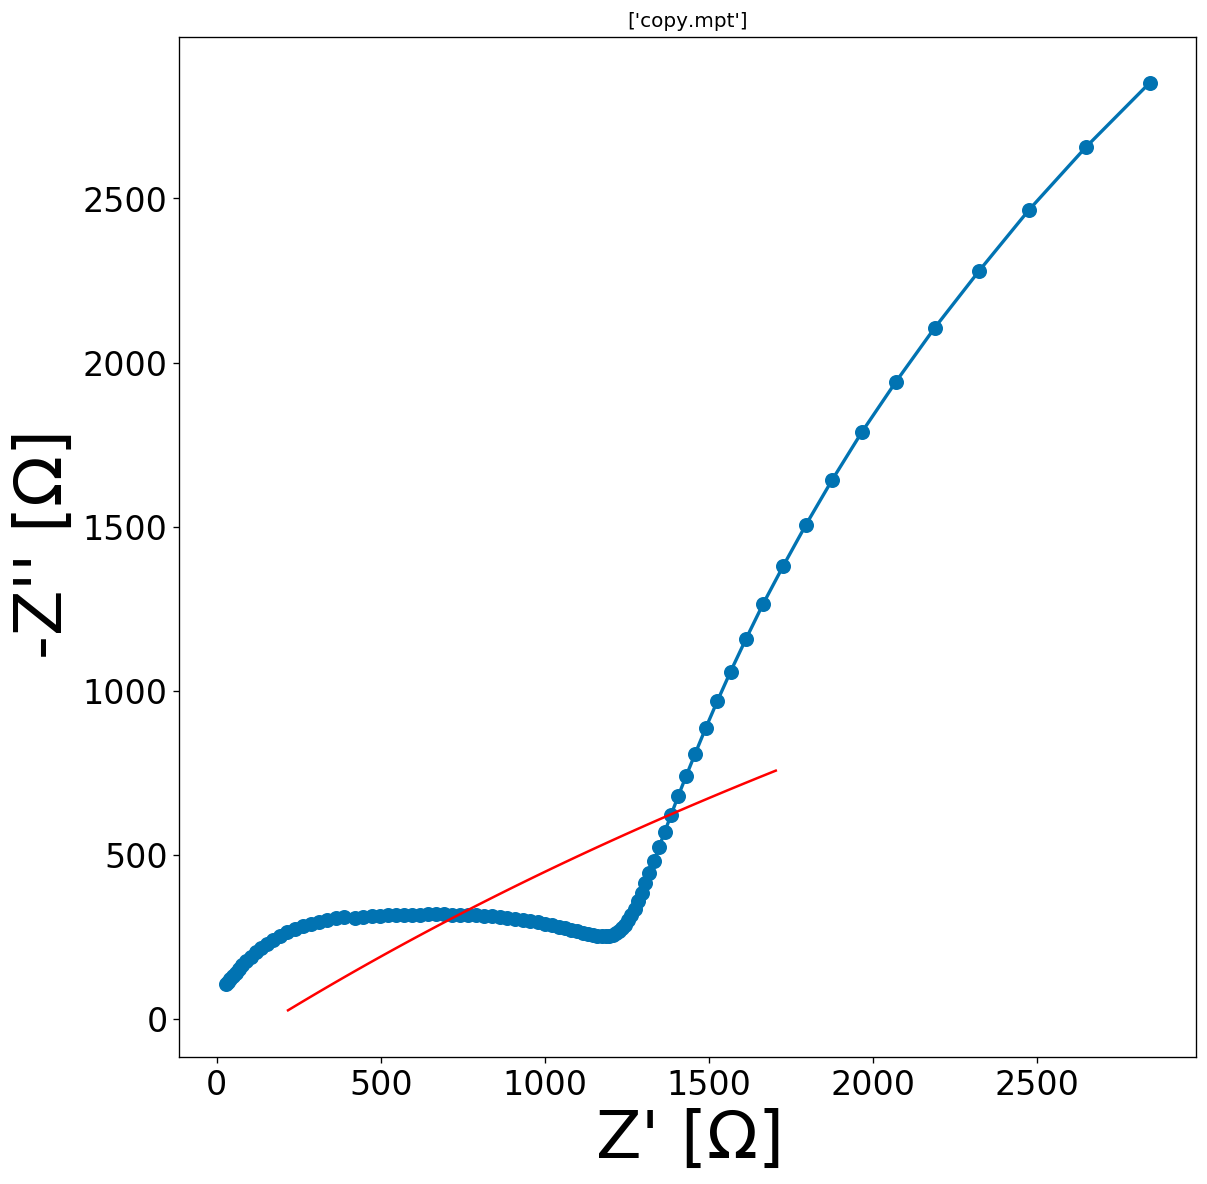

In [11]:
masked_mpt.mpt_plot(fitting = "on")